**Miljødataanalyse**   
 
Denne notebooken samler visualisering, statistisk analyse og prediktiv modellering i en oversiktlig fremstilling.

In [3]:
import os
import sys
sys.path.append(os.path.abspath("../src"))

import pandas as pd
from datetime import datetime
from fetch_data import fetch_data_from_frost
from process_data import process_and_clean_data
from visualize_data import plot_histogram
from visualize_data import plot_scatterplot
from regression_model import train_model_for_city
from visualize_data import (
    plot_temperature_trend,
    plot_environmental_factors,
    plot_precipitation,
    plot_wind_speed
)
from analyze_data import (
    print_basic_statistics,
    print_correlation,
    plot_distribution,
    print_skewness
)

# Les inn datasettet
file_path = '../data/weekly_weather_data.csv'
df = pd.read_csv(file_path)
df['Time'] = pd.to_datetime(df['Time'])
print("Data loaded")

Data loaded


Temperatur utvikling for byene - Steinkjer, Molde & Ålesund

                       elementId  value  unit  \
0      mean(air_temperature P1D)   -2.8  degC   
1      mean(air_temperature P1D)    1.0  degC   
4      mean(air_temperature P1D)  -10.3  degC   
5      mean(air_temperature P1D)   -5.1  degC   
8      mean(air_temperature P1D)   -5.8  degC   
...                          ...    ...   ...   
10541  mean(air_temperature P1D)    7.6  degC   
10545  mean(air_temperature P1D)    7.9  degC   
10546  mean(air_temperature P1D)    7.9  degC   
10550  mean(air_temperature P1D)    6.3  degC   
10551  mean(air_temperature P1D)    7.1  degC   

                                                   level timeOffset  \
0      {'levelType': 'height_above_ground', 'unit': '...       PT0H   
1      {'levelType': 'height_above_ground', 'unit': '...       PT6H   
4      {'levelType': 'height_above_ground', 'unit': '...       PT0H   
5      {'levelType': 'height_above_ground', 'unit': '...       PT6H   
8      {'levelType': 'height_above_ground', 'unit': '...

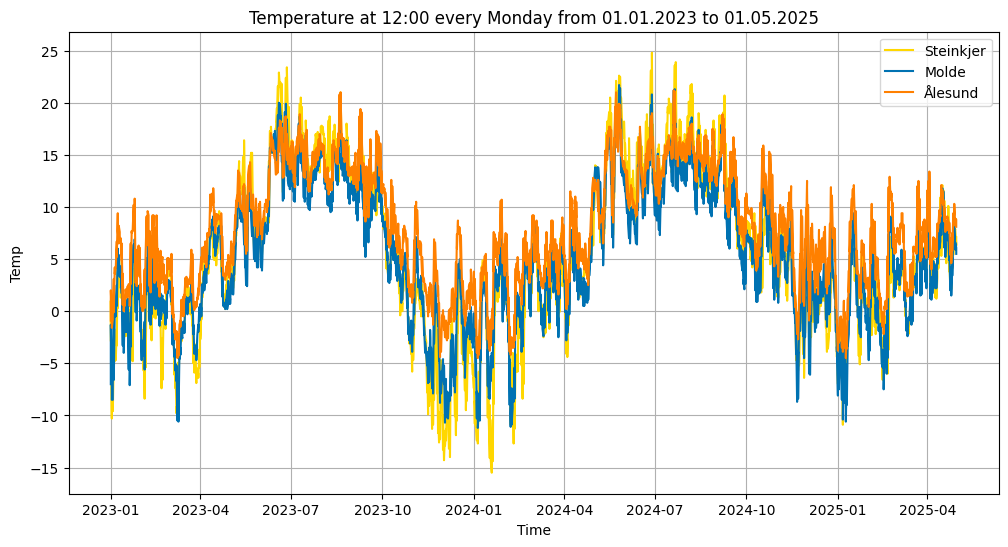

                         elementId  value     unit  \
3      mean(relative_humidity P1D)   85.0  percent   
7      mean(relative_humidity P1D)   80.0  percent   
11     mean(relative_humidity P1D)   88.0  percent   
15     mean(relative_humidity P1D)   70.0  percent   
19     mean(relative_humidity P1D)   64.0  percent   
...                            ...    ...      ...   
10534  mean(relative_humidity P1D)   62.0  percent   
10539  mean(relative_humidity P1D)   74.0  percent   
10544  mean(relative_humidity P1D)   91.0  percent   
10549  mean(relative_humidity P1D)   81.0  percent   
10554  mean(relative_humidity P1D)   82.0  percent   

                                                   level timeOffset  \
3      {'levelType': 'height_above_ground', 'unit': '...       PT0H   
7      {'levelType': 'height_above_ground', 'unit': '...       PT0H   
11     {'levelType': 'height_above_ground', 'unit': '...       PT0H   
15     {'levelType': 'height_above_ground', 'unit': '...       PT0H

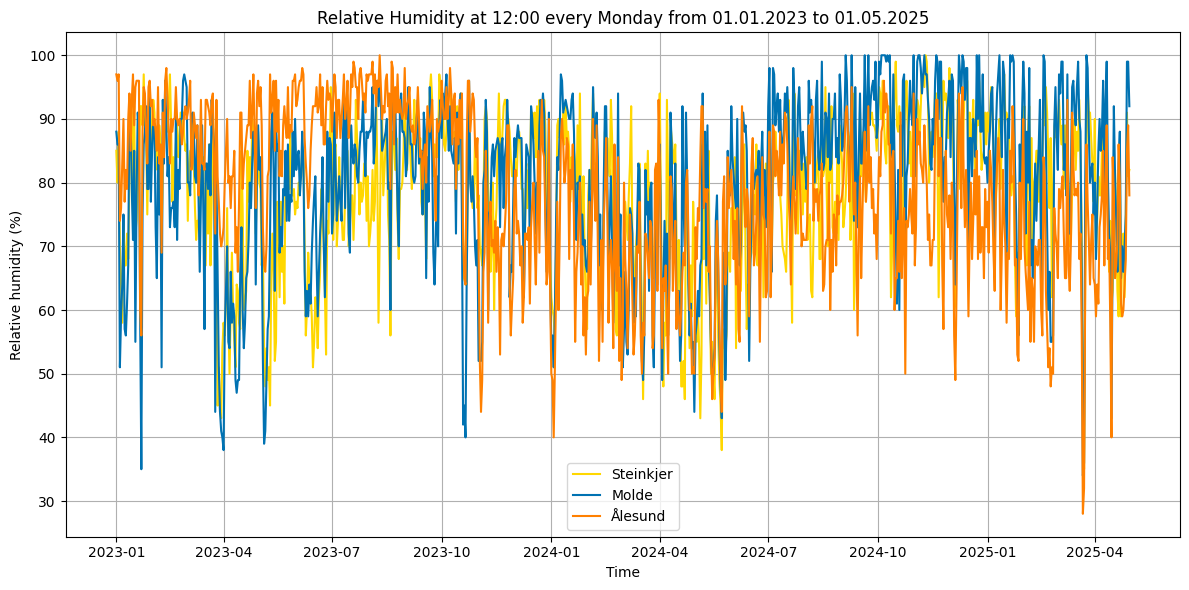

                           elementId  value unit level timeOffset  \
360    sum(precipitation_amount P1D)    0.0   mm   NaN      PT18H   
361    sum(precipitation_amount P1D)    0.0   mm   NaN       PT6H   
366    sum(precipitation_amount P1D)    0.0   mm   NaN      PT18H   
367    sum(precipitation_amount P1D)    0.0   mm   NaN       PT6H   
371    sum(precipitation_amount P1D)    0.2   mm   NaN      PT18H   
...                              ...    ...  ...   ...        ...   
10543  sum(precipitation_amount P1D)    2.8   mm   NaN       PT6H   
10547  sum(precipitation_amount P1D)    2.2   mm   NaN      PT18H   
10548  sum(precipitation_amount P1D)   10.0   mm   NaN       PT6H   
10552  sum(precipitation_amount P1D)    9.8   mm   NaN      PT18H   
10553  sum(precipitation_amount P1D)   10.4   mm   NaN       PT6H   

      timeResolution  timeSeriesId performanceCategory  exposureCategory  \
360              P1D             0                   C                 2   
361              P1

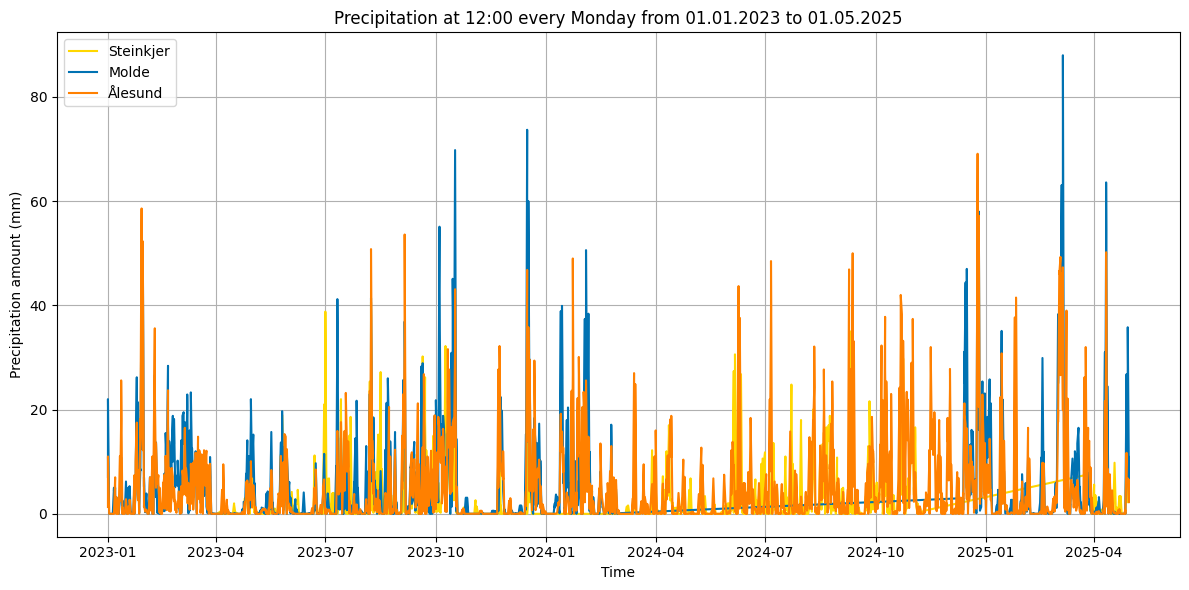

                elementId  value unit  \
2    mean(wind_speed P1D)    2.3  m/s   
6    mean(wind_speed P1D)    3.7  m/s   
10   mean(wind_speed P1D)    1.7  m/s   
14   mean(wind_speed P1D)    2.8  m/s   
18   mean(wind_speed P1D)    8.4  m/s   
..                    ...    ...  ...   
899  mean(wind_speed P1D)    0.5  m/s   
905  mean(wind_speed P1D)    1.0  m/s   
916  mean(wind_speed P1D)    0.8  m/s   
947  mean(wind_speed P1D)    1.5  m/s   
953  mean(wind_speed P1D)    2.2  m/s   

                                                 level timeOffset  \
2    {'levelType': 'height_above_ground', 'unit': '...       PT0H   
6    {'levelType': 'height_above_ground', 'unit': '...       PT0H   
10   {'levelType': 'height_above_ground', 'unit': '...       PT0H   
14   {'levelType': 'height_above_ground', 'unit': '...       PT0H   
18   {'levelType': 'height_above_ground', 'unit': '...       PT0H   
..                                                 ...        ...   
899  {'levelType': 'heig

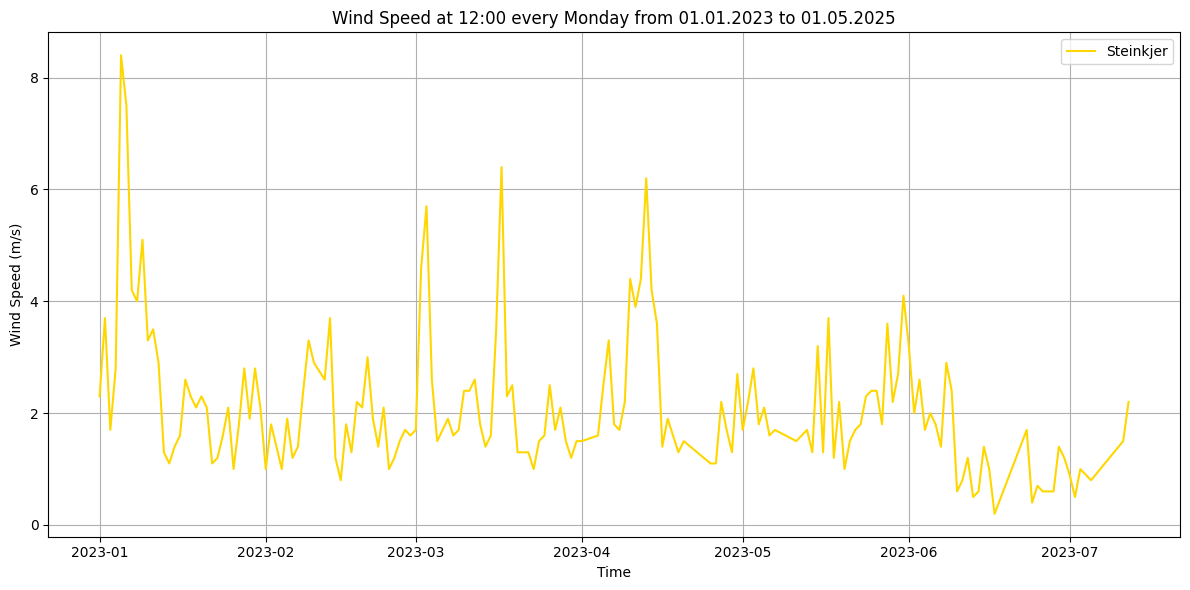

In [6]:
plot_temperature_trend(df)
plot_environmental_factors(df)
plot_precipitation(df)
plot_wind_speed(df)

Statistisk analyse

In [7]:
print_basic_statistics(df)
print_correlation(df)
print_skewness(df)
plot_distribution(df, "Air temperature (°C)")


Descriptive statistics (temperature, precipitation, wind, humidity):

Air Temperature (°C):
  Mean:      6.26
  Median:    5.90
  Std. dev.: 6.84

Precipitation (mm):
  Mean:      4.46
  Median:    0.60
  Std. dev.: 8.50

Wind Speed (m/s):
  Mean:      2.10
  Median:    1.80
  Std. dev.: 1.25

Relative Humidity (%):
  Mean:      78.79
  Median:    81.00
  Std. dev.: 12.86

Correlation between temperature and other variables:
  Temp vs. Humidity: -0.05
  Temp vs. Wind Speed: -0.21
  Temp vs. Precipitation: -0.01

Skewness in key variables:
  Temperature: -0.12
  Wind Speed: 2.04
  Precipitation: 3.39
  Humidity: -0.68
No data found for: Air temperature (°C)


Histogram

In [8]:
plot_histogram(df, "mean(air_temperature P1D)", "Air Temperature (°C)")
plot_histogram(df, "mean(relative_humidity P1D)", "Relative Humidity (%)")

Prediktiv analyse - lineær regresjon per by


Training model for Steinkjer...
R² score for Steinkjer: 0.25
MSE for Steinkjer: 103.71


/Users/eier/Documents/GitHub/Miljo-dataanalyse/Miljo-dataanalyse/src/visualize_data.py:150: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.



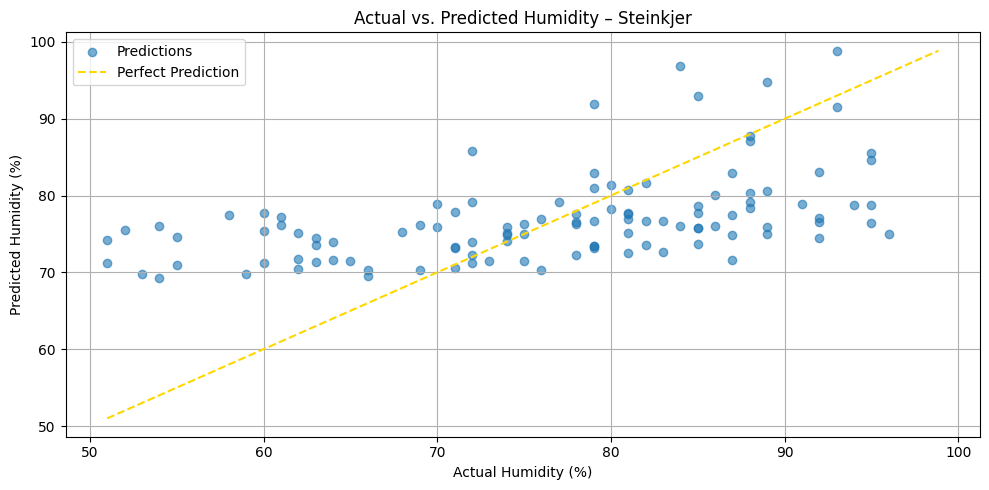


Training model for Molde...
R² score for Molde: 0.12
MSE for Molde: 126.67


/Users/eier/Documents/GitHub/Miljo-dataanalyse/Miljo-dataanalyse/src/visualize_data.py:150: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.



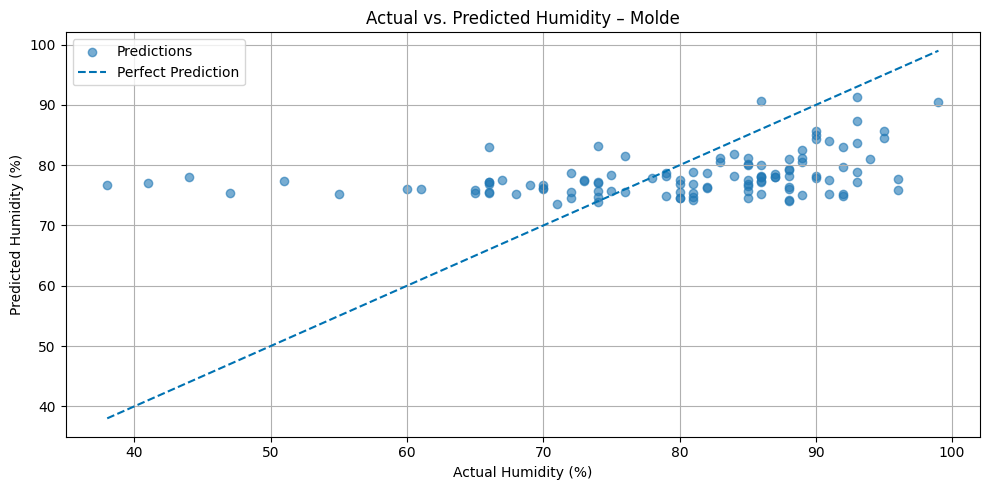


Training model for Ålesund...
R² score for Ålesund: 0.05
MSE for Ålesund: 141.47


/Users/eier/Documents/GitHub/Miljo-dataanalyse/Miljo-dataanalyse/src/visualize_data.py:150: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.



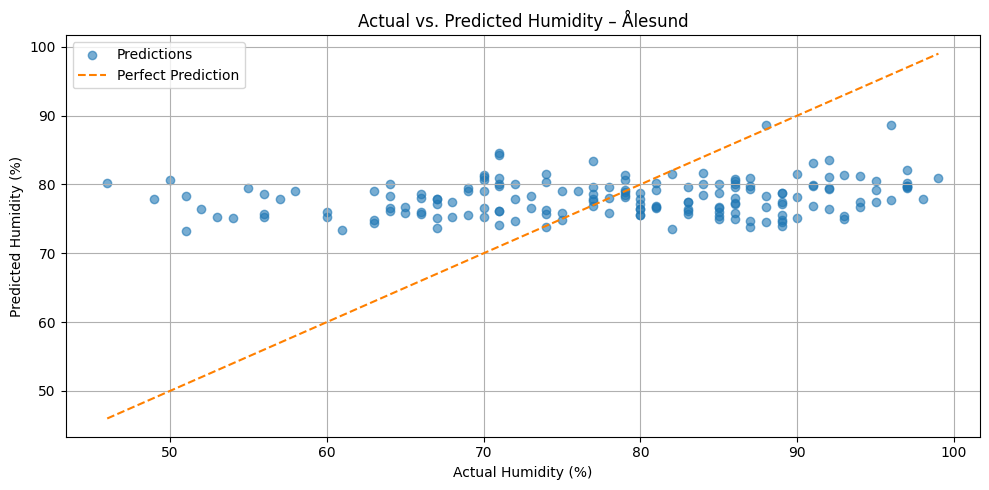

In [9]:
for city in df['Location'].unique():
    model, y_test, y_pred = train_model_for_city(df, city)
    plot_scatterplot(y_test, y_pred, city)